# <center>「YOLOv10n」The Drug Name Detection Dataset</center>
### <center>If you feel my notebook helpful, support with one upvote, thank you👍</center>

# <div style="border-radius:10px; border:#E75480 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:center">Import Libraries</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install ultralytics --quiet

In [3]:
import os
import yaml
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", font="SimHei", rc={"axes.unicode_minus":False})

import torch
from ultralytics import YOLO

from PIL import Image

seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

# <div style="border-radius:10px; border:#E75480 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:center">Modeling</div>

In [4]:
model = YOLO("yolov10n.pt")

In [5]:
config = {
    "path": "/kaggle/input/the-drug-name-detection-dataset",
    "train": "/kaggle/input/the-drug-name-detection-dataset/train",
    "val": "/kaggle/input/the-drug-name-detection-dataset/valid",
    "test": "/kaggle/input/the-drug-name-detection-dataset/test",
    "nc": 1,
    "names": ["drug-name"],
}

with open("data.yaml", "w") as file:
    yaml.dump(config, file, default_flow_style=False)

In [6]:
!wandb disabled

W&B disabled.


In [7]:
results = model.train(data="data.yaml", epochs=100, save_period=10, seed=seed, name="yolov10n")

Ultralytics 8.3.235 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov10n, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pre

2025-12-06 17:05:55,084	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-12-06 17:05:55,252	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

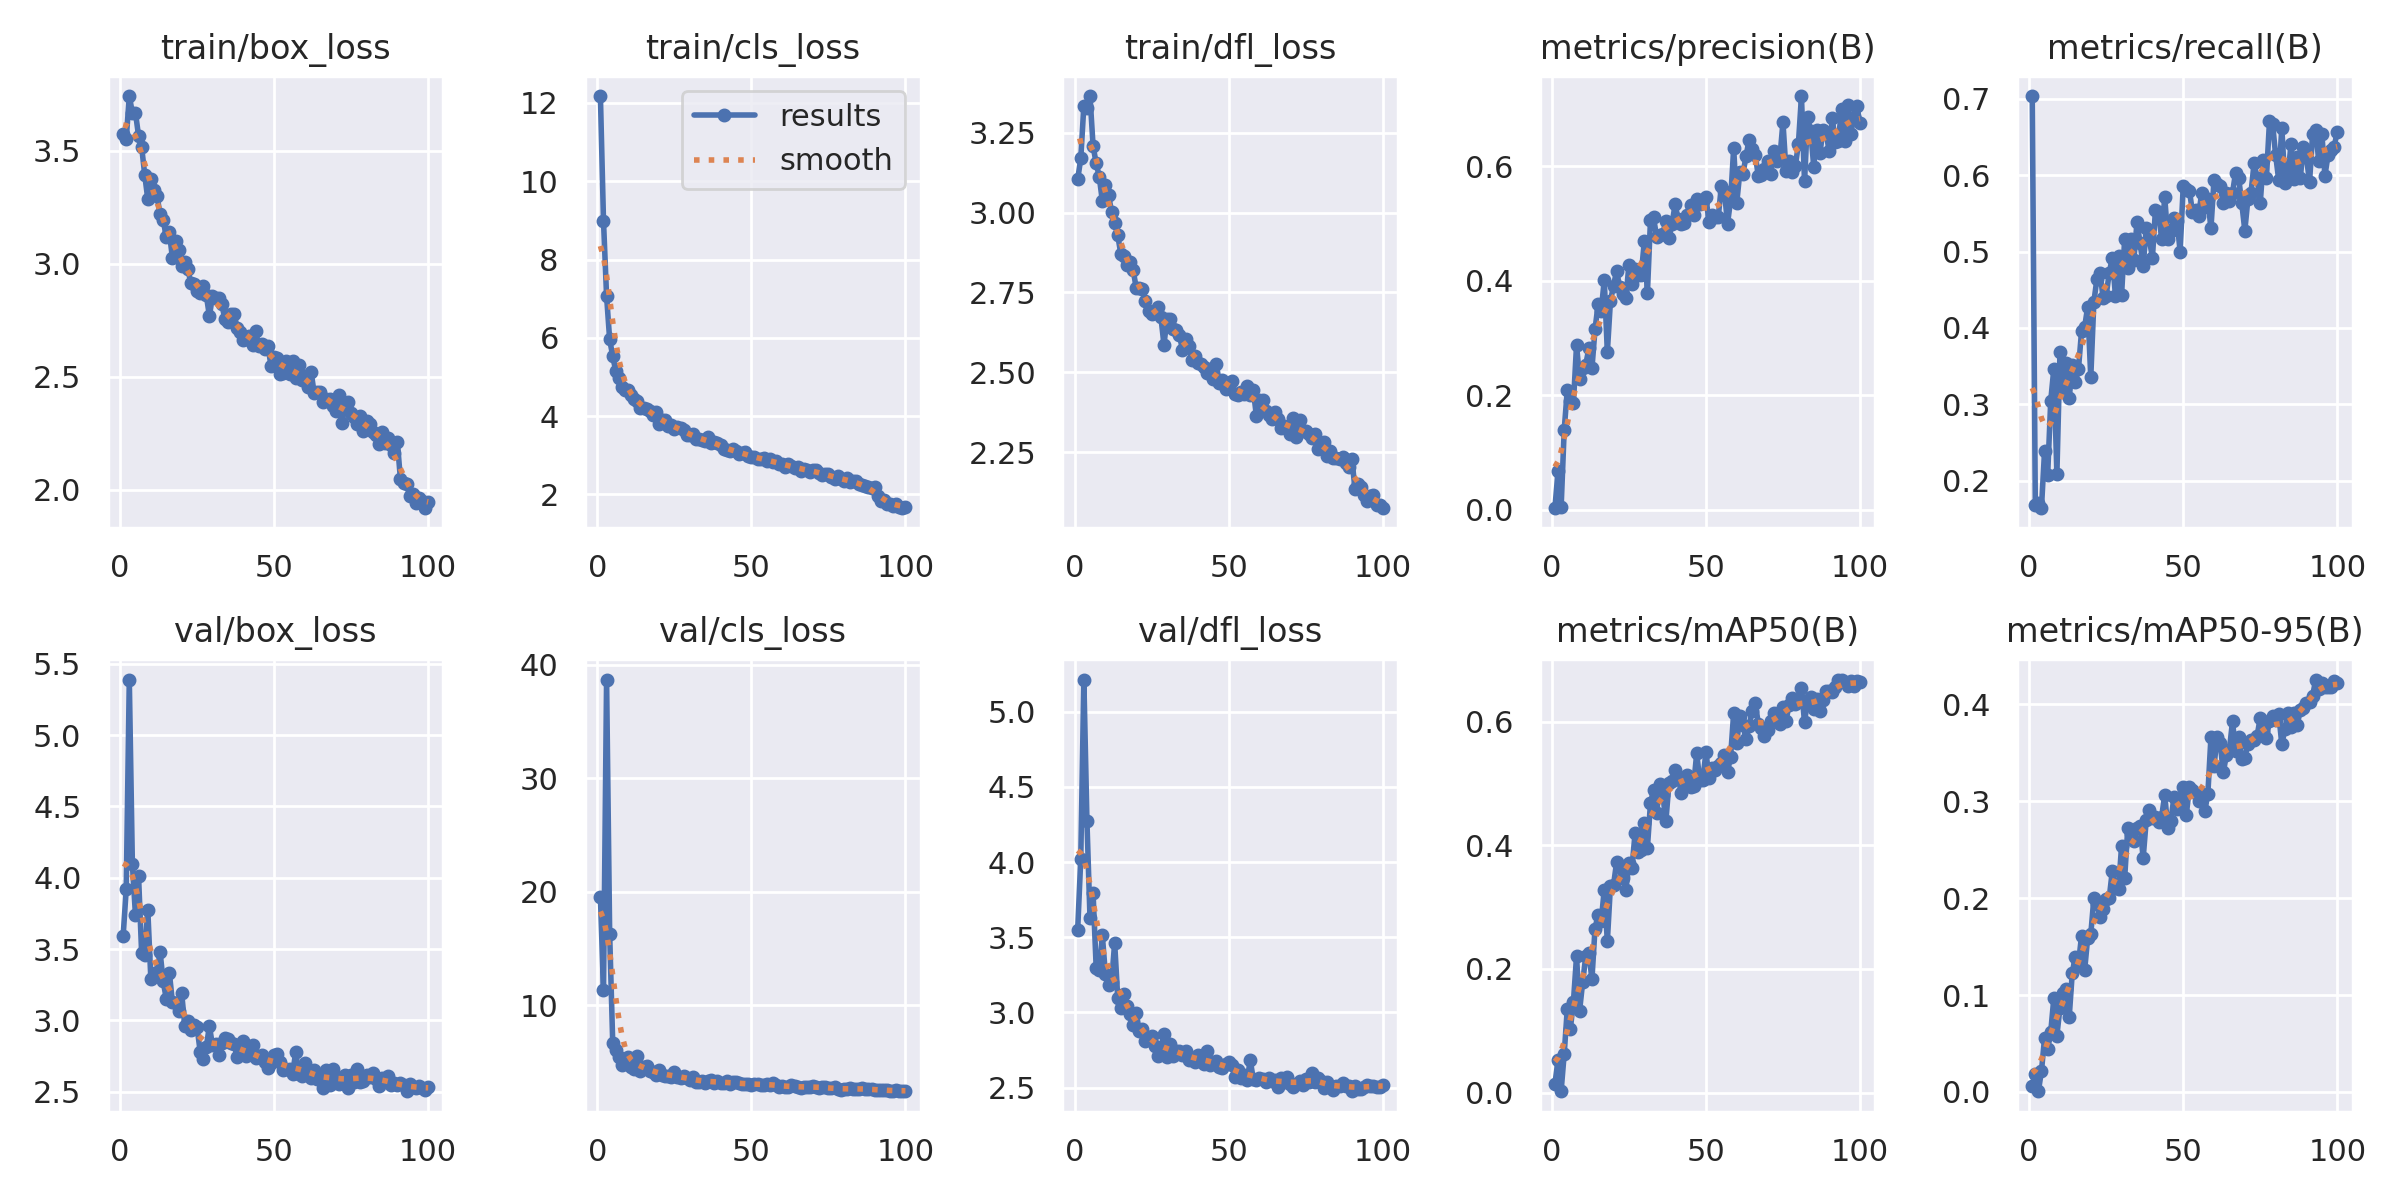

In [8]:
Image.open("/kaggle/working/runs/detect/yolov10n/results.png")

In [9]:
# Export and Save Model for further uses
import shutil

# Path of model (best.pt)
# Normally at: runs/detect/{name}/weights/best.pt
best_model_path = "runs/detect/yolov10n/weights/best.pt"
output_model_name = "yolov10n_best_model.pt"

if os.path.exists(best_model_path):
    # Copy to path for easier to download/use
    shutil.copy(best_model_path, output_model_name)
    print(f"Successfully! Saved model at: {output_model_name}")
    print("You can use this model for Prediction.")
else:
    print("Model not found, please check the path.")

# (Optional) If you want Export to other format (e.g., ONNX)
# success = model.export(format='onnx') 

Successfully! Saved model at: yolov10n_best_model.pt
You can use this model for Prediction.


In [10]:
# Validate on the 'test' split specifically
metrics = model.val(split='test')

Ultralytics 8.3.235 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv10n summary (fused): 102 layers, 2,265,363 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 1.7±0.2 ms, read: 73.6±34.2 MB/s, size: 27.8 KB)
val: Scanning /kaggle/input/the-drug-name-detection-dataset/test/labels... 182 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 182/182 636.3it/s 0.3s0.2s
WARNING ⚠️ val: Cache directory /kaggle/input/the-drug-name-detection-dataset/test is not writable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 25, len(boxes) = 182. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 12/12 3.4it/s 3.5s0.2s
                   all        182        182      0.602       0.67   

In [11]:
# Extract key metrics
map50 = metrics.box.map50
map50_95 = metrics.box.map
precision = metrics.box.mp
recall = metrics.box.mr

# Calculate F1-Score manually (Harmonic Mean of Precision and Recall)
# Formula: F1 = 2 * (P * R) / (P + R)
f1_score = 0.0
if (precision + recall) > 0:
    f1_score = 2 * (precision * recall) / (precision + recall)

print("\n" + "="*40)
print("   MODEL PERFORMANCE METRICS on {TEST SET}")
print("="*40)
print(f"mAP@50       : {map50:.4f}")
print(f"mAP@50-95    : {map50_95:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"F1-Score     : {f1_score:.4f}")
print("="*40 + "\n")


   MODEL PERFORMANCE METRICS on {TEST SET}
mAP@50       : 0.6705
mAP@50-95    : 0.4339
Precision    : 0.6023
Recall       : 0.6703
F1-Score     : 0.6345



# <div style="border-radius:10px; border:#E75480 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:center">Predict Test Data</div>

In [12]:
paths = glob.glob("/kaggle/input/the-drug-name-detection-dataset/test/images/*")


0: 640x640 (no detections), 6.5ms
1: 640x640 2 drug-names, 6.5ms
2: 640x640 1 drug-name, 6.5ms
3: 640x640 1 drug-name, 6.5ms
4: 640x640 1 drug-name, 6.5ms
5: 640x640 (no detections), 6.5ms
6: 640x640 2 drug-names, 6.5ms
7: 640x640 2 drug-names, 6.5ms
8: 640x640 1 drug-name, 6.5ms
9: 640x640 (no detections), 6.5ms
Speed: 1.9ms preprocess, 6.5ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


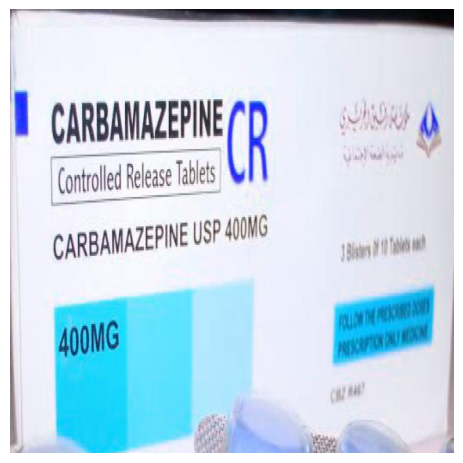

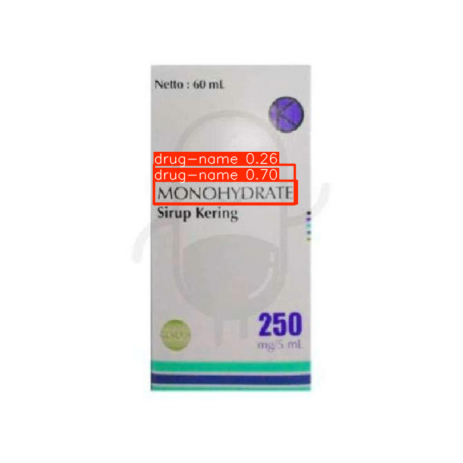

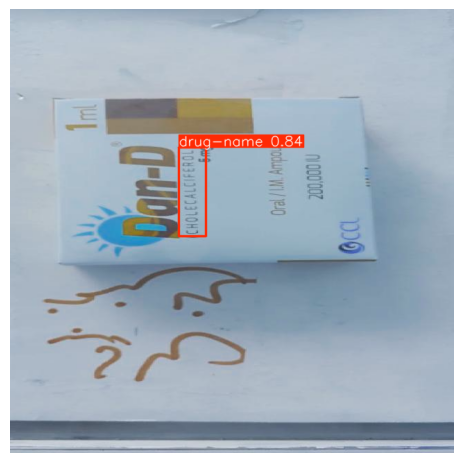

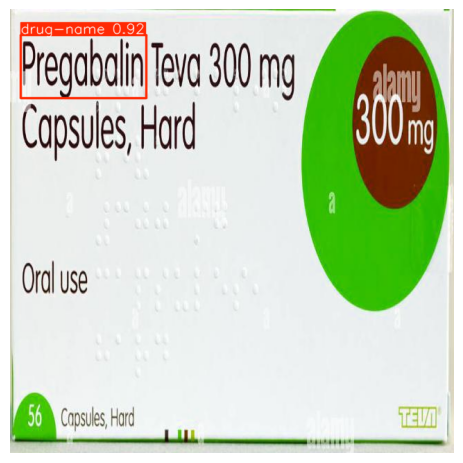

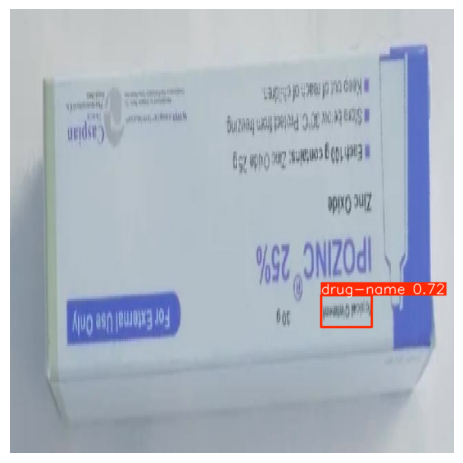

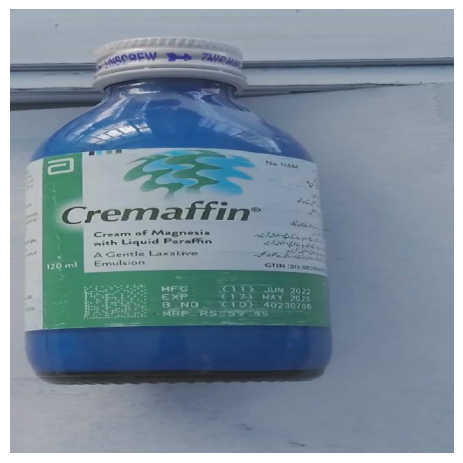

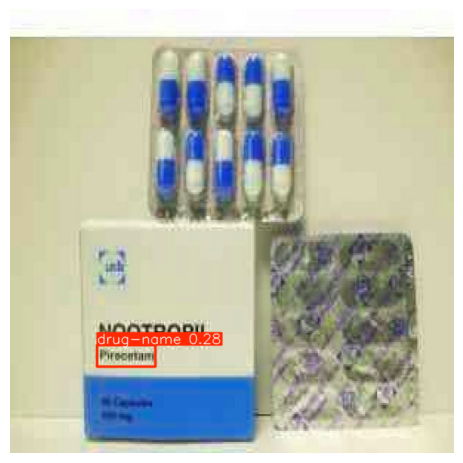

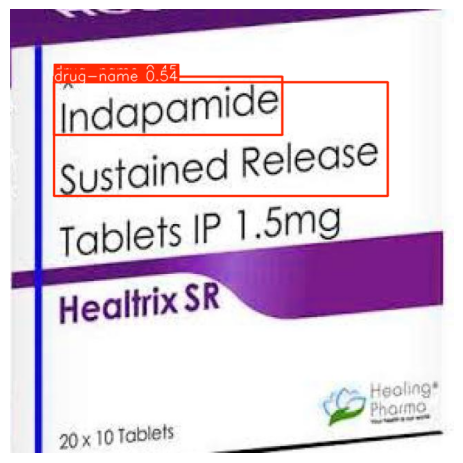

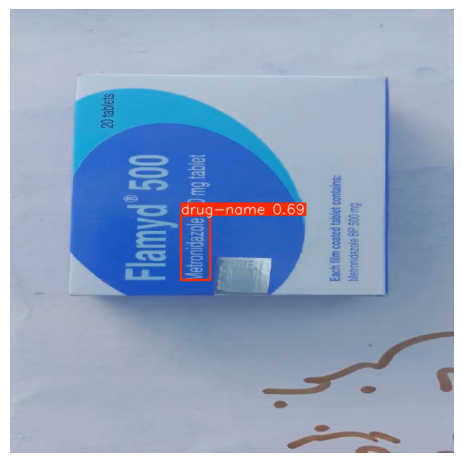

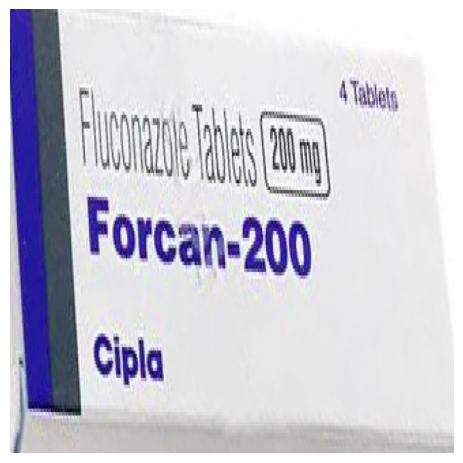

In [13]:
n = 10
results = model.predict(paths[:n])
for i in range(n):
    r = results[i]
    img = Image.fromarray(r.plot())
    plt.figure(dpi=100)
    plt.imshow(img)
    plt.axis("off")
    plt.tight_layout()
    plt.show()